## IMDB Exploratory Data Analysis


[IMBD Dataset](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset)


In [1]:
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
sns.set_style("whitegrid")
%matplotlib inline

scipy: 0.18.1
numpy: 1.11.3
matplotlib: 2.0.0
pandas: 0.19.2
sklearn: 0.18.1
seaborn: 0.7.1


In [2]:
%time 

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 9.78 µs


In [3]:
!head -n3 ../datasets/hw1/movie_metadata.csv

In [4]:
movie = pd.read_csv("../datasets/hw1/movie_metadata.csv")
movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [5]:
movie.shape

(5043, 28)

In [6]:
pd.DataFrame(movie.columns)

,0
0,color
1,director_name
2,num_critic_for_reviews
3,duration
4,director_facebook_likes
5,actor_3_facebook_likes
6,actor_2_name
7,actor_1_facebook_likes
8,gross
9,genres


In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [8]:
# define columns groups
categorical_vars = ['color', 'genres', 'language', 'country', 'content_rating']
text_vars = ['director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords',
            'movie_imdb_link']
numerical_vars = [ 'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
                 'actor_1_facebook_likes', 'num_voted_users', 'cast_total_facebook_likes', 
                 'facenumber_in_poster','num_user_for_reviews','budget', 'title_year', 'actor_2_facebook_likes'
                  'aspect_ratio', 'movie_facebook_likes', 'num_critic_for_reviews',]
rating_vars = ['gross', 'imdb_score' ]

In [9]:
#check how many NaN
len(movie) - movie.count()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

# Summary Statistics

In [10]:
movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [11]:
# remove gross that are outliers
movie[np.abs(movie.gross-movie.gross.mean())<=(3*movie.gross.std())] #keep only the ones that are within +3 to -3 standard deviations 

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,2367.0,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0
12,Color,Marc Forster,403.0,106.0,395.0,393.0,Mathieu Amalric,451.0,168368427.0,Action|Adventure,...,1243.0,English,UK,PG-13,200000000.0,2008.0,412.0,6.7,2.35,0
14,Color,Gore Verbinski,450.0,150.0,563.0,1000.0,Ruth Wilson,40000.0,89289910.0,Action|Adventure|Western,...,711.0,English,USA,PG-13,215000000.0,2013.0,2000.0,6.5,2.35,48000
16,Color,Andrew Adamson,258.0,150.0,80.0,201.0,Pierfrancesco Favino,22000.0,141614023.0,Action|Adventure|Family|Fantasy,...,438.0,English,USA,PG,225000000.0,2008.0,216.0,6.6,2.35,0
18,Color,Rob Marshall,448.0,136.0,252.0,1000.0,Sam Claflin,40000.0,241063875.0,Action|Adventure|Fantasy,...,484.0,English,USA,PG-13,250000000.0,2011.0,11000.0,6.7,2.35,58000
19,Color,Barry Sonnenfeld,451.0,106.0,188.0,718.0,Michael Stuhlbarg,10000.0,179020854.0,Action|Adventure|Comedy|Family|Fantasy|Sci-Fi,...,341.0,English,USA,PG-13,225000000.0,2012.0,816.0,6.8,1.85,40000
22,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,105219735.0,Action|Adventure|Drama|History,...,546.0,English,USA,PG-13,200000000.0,2010.0,882.0,6.7,2.35,17000


In [12]:
movie.shape

(5043, 28)

## Univariate Plots

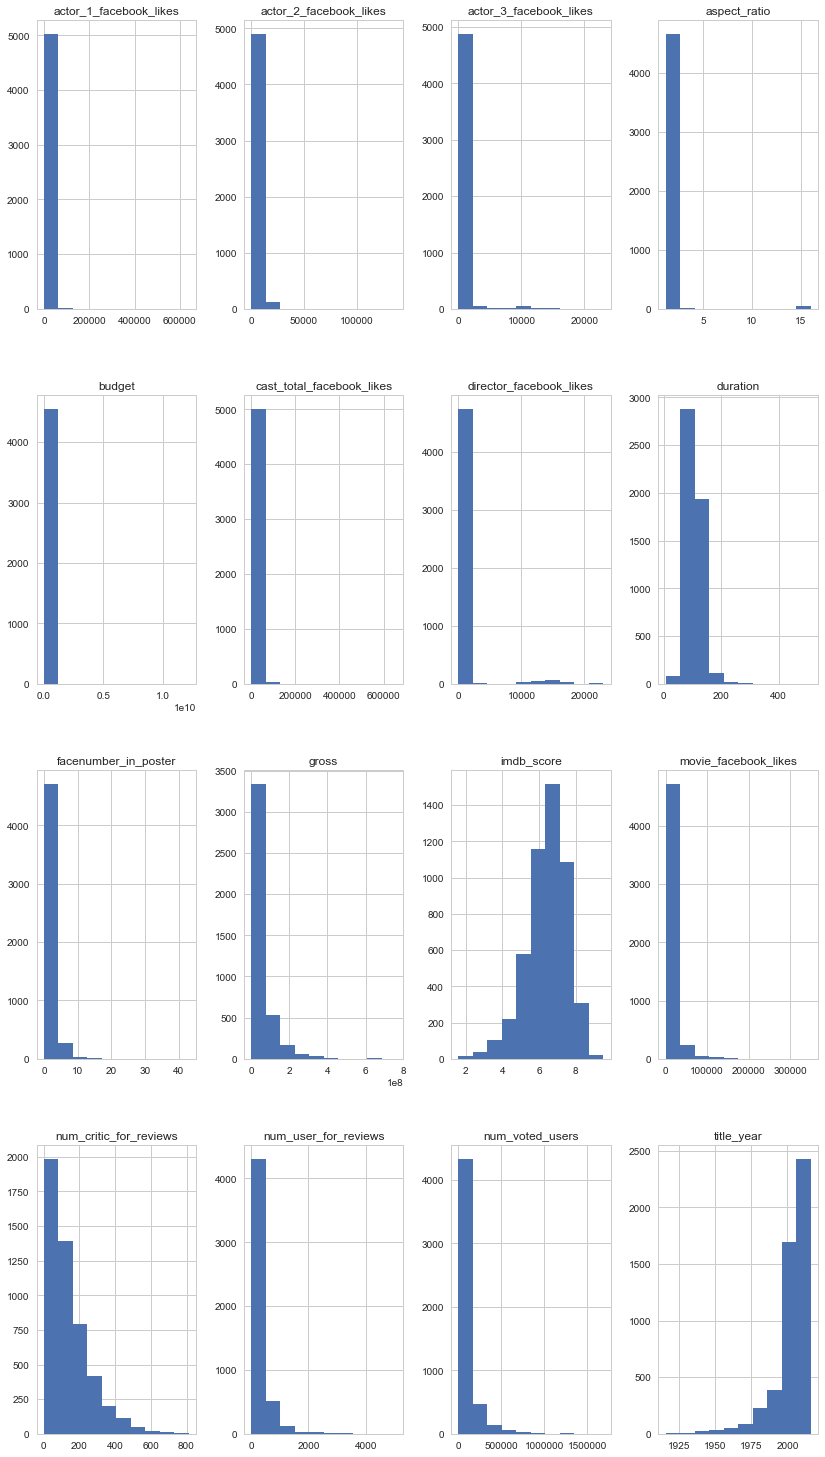

In [13]:
movie.hist(figsize=(14, 26))
plt.show()

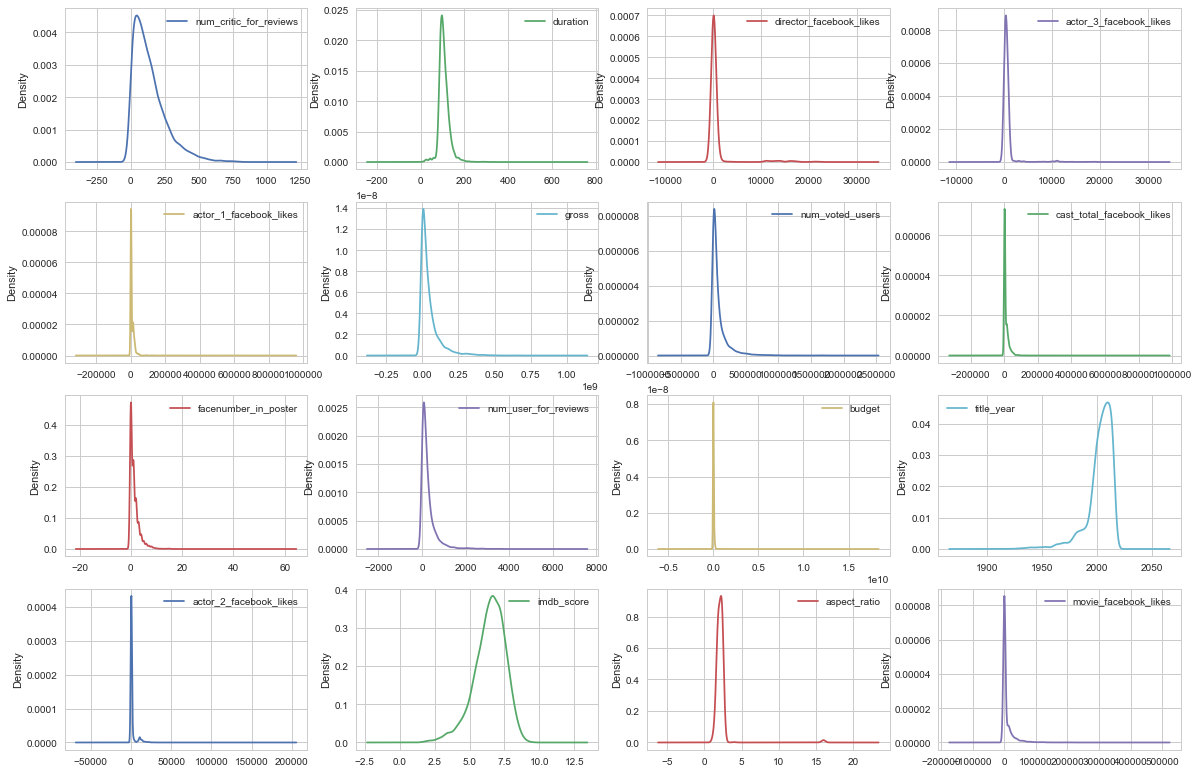

In [14]:
movie.plot(kind='density', figsize=(20, 35), layout=(10,4), subplots=True, sharex=False) 
plt.show()

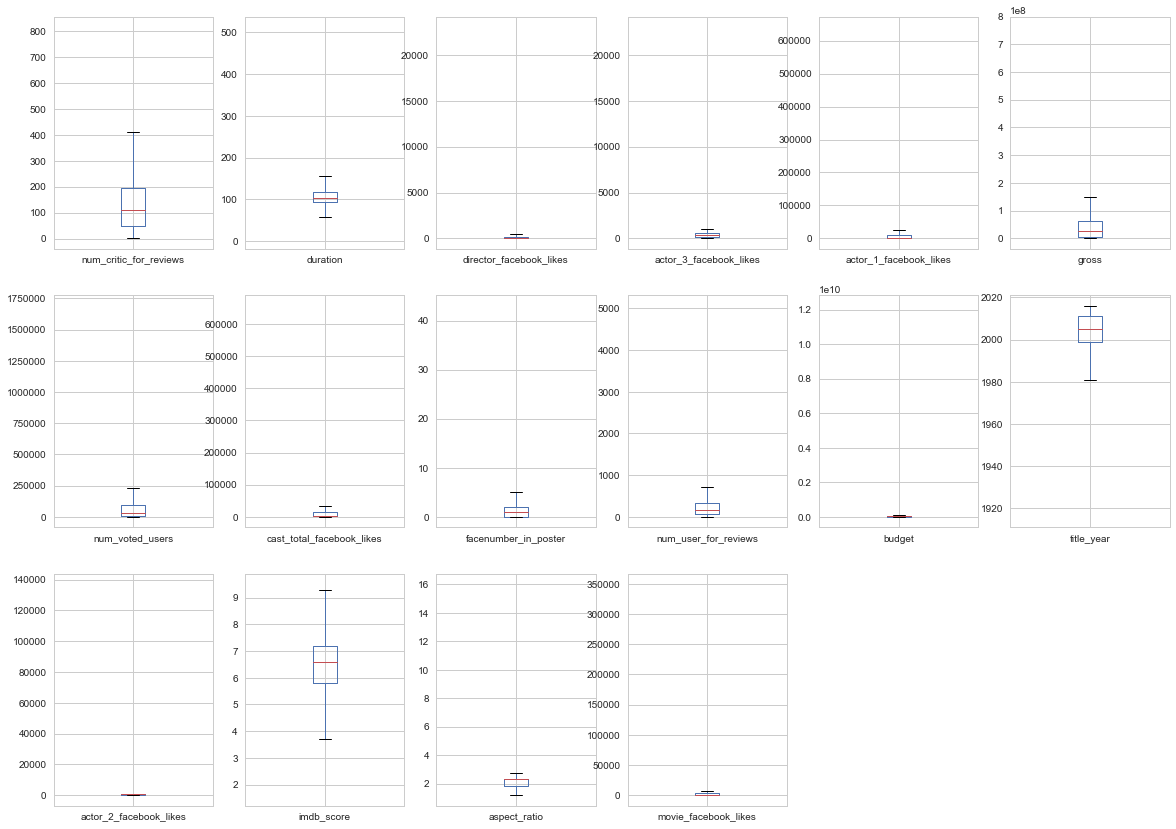

In [15]:
movie.plot(kind='box', subplots=True, figsize=(20, 35), layout=(7,6), sharex=False, sharey=False) 
plt.show()

## Correlations Between Attributes

In [16]:
#look for correlation of number_vars and rating_vars in movie data set
movie.corr(method='pearson')

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


<module 'matplotlib.pyplot' from '/Users/cindyqiu/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

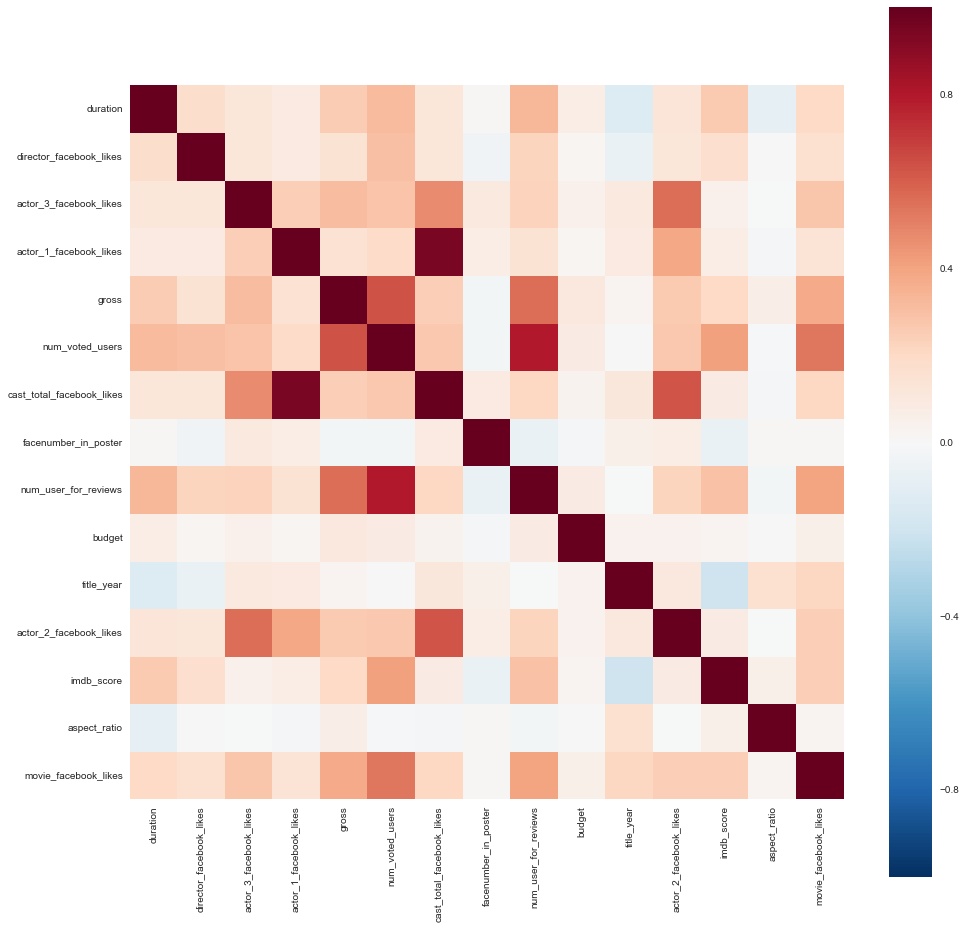

In [17]:
corr = movie.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, vmax=1, square=True)
sns.plt

About imdb_score:
1. imdb_score and num_voted_users in high positive correlation;
2. imdb_score and num_user_for_reviews in high positive correlation;
3. imdb_score and movie_facebook_likes in medium poitive correlation;
4. imdb_score and cast_total_facebook_likes in low positive correlation;
5. imdb_score and title_year in negative correlation;
6. imdb_score and facenumber_in_poster in negative correlation;
7. imdb_score seems has no correlation with budget;



About gross:
1. gross and num_voted_users in high positive correlation;
2. gross and num_user_for_reviews in high positive correlation;
3. gross and movie_facebook_likes in high poitive correlation;
4. gross and cast_total_facebook_likes in medium positive correlation;
5. gross and imdb_score has little correlation.

# Trend of Gross

In [18]:
movie[['gross']].describe()

,gross
count,4.159000e+03
mean,4.846841e+07
std,6.845299e+07
min,1.620000e+02
25%,5.340988e+06
50%,2.551750e+07
75%,6.230944e+07
max,7.605058e+08


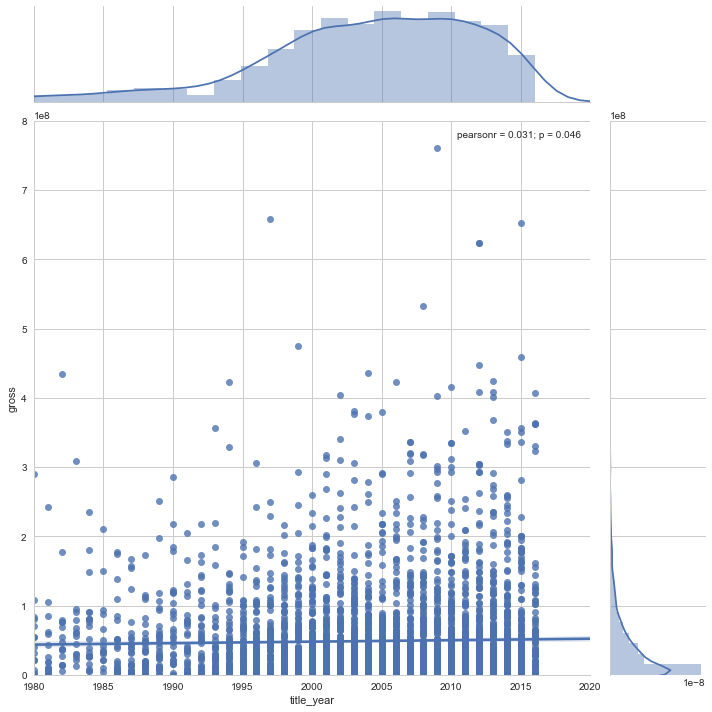

In [19]:
sns.jointplot(data = movie, x="title_year", y="gross",kind='reg',size=10,ylim = [1.620000e+02,8.0e+08],xlim=[1980,2020])

From figure above we can find we have more high gross movies after 1995, but the inflation rate would be a skew factor for the data.

# Trend of imdb_score

In [20]:
movie[['imdb_score']].describe()

,imdb_score
count,5043.000000
mean,6.442138
std,1.125116
min,1.600000
25%,5.800000
50%,6.600000
75%,7.200000
max,9.500000


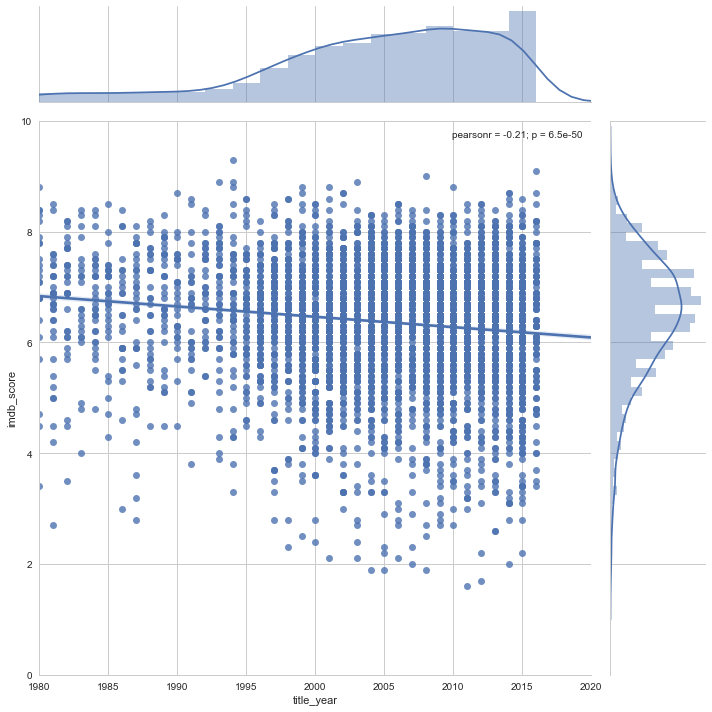

In [21]:
sns.jointplot(data = movie,  x="title_year",y="imdb_score", kind='reg',size=10,ylim = [0,10], xlim=[1980,2020])

From figure above we can find the we have more imdb_score rating, and the rating starting to become lower and lower.

# Find the language and country influence of imdb_score

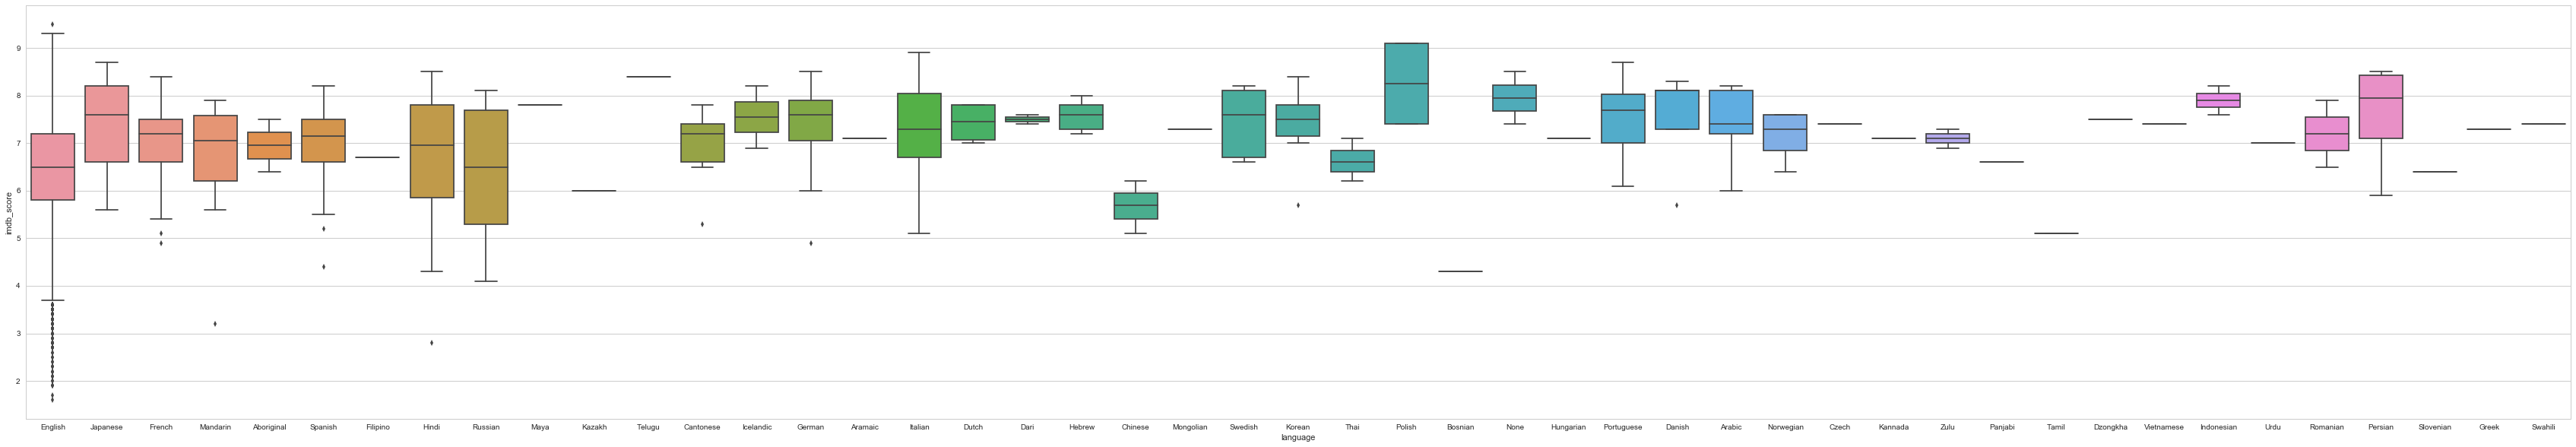

In [22]:
plt.figure(figsize=(60,10))
sns.boxplot(x='language', y='imdb_score', data=movie)

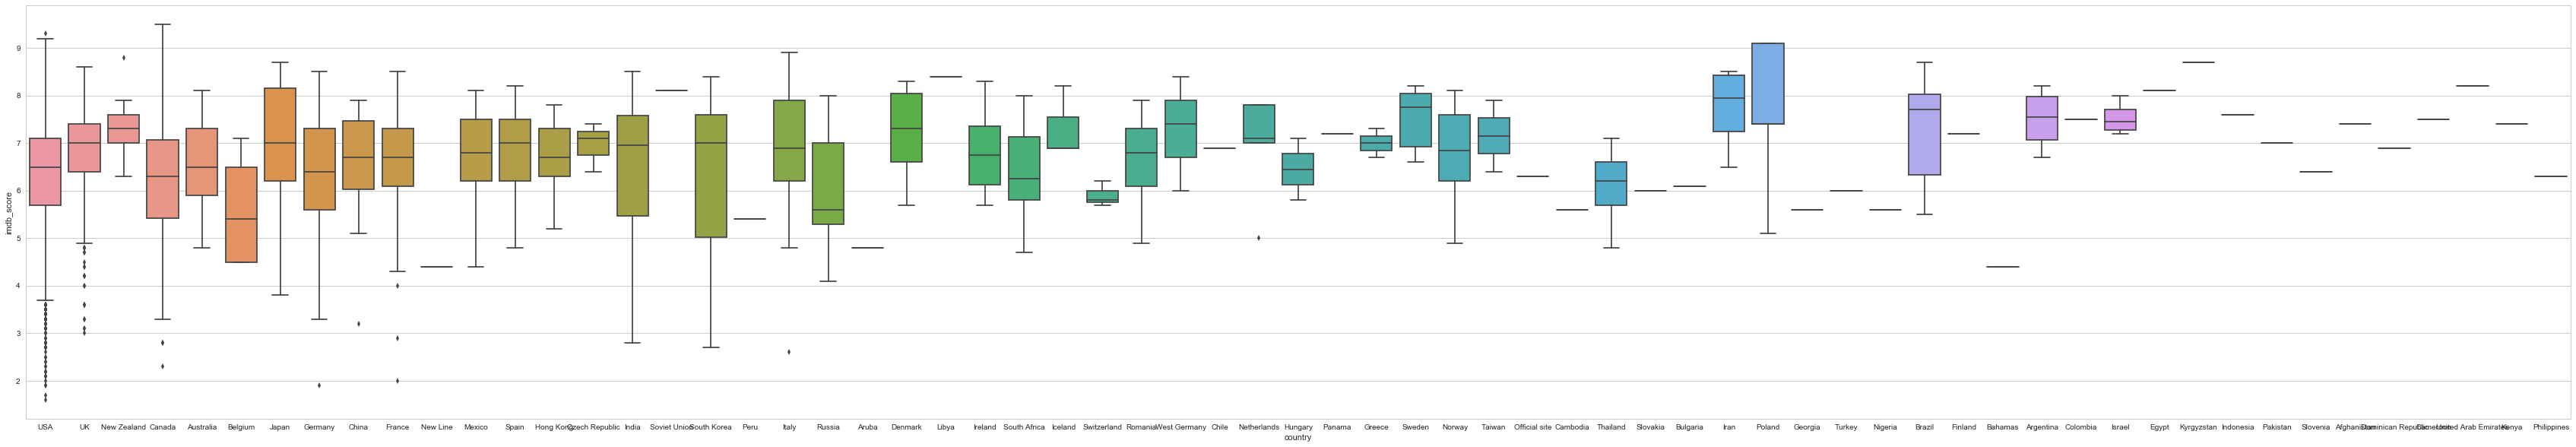

In [23]:
plt.figure(figsize=(60,10))
sns.boxplot(x='country', y='imdb_score', data=movie)

Not sure what to conclude from above figure.

# Genre influence

In [24]:
# Clean data first
genre = movie[['gross', 'imdb_score', 'genres', 'title_year', 'facenumber_in_poster']]
#using pandas clean genres data

In [25]:
genre[['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8']]= genre['genres'].str.split('|', expand=True)
genre

/Users/cindyqiu/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,gross,imdb_score,genres,title_year,facenumber_in_poster,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8
0,760505847.0,7.9,Action|Adventure|Fantasy|Sci-Fi,2009.0,0.0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,309404152.0,7.1,Action|Adventure|Fantasy,2007.0,0.0,Action,Adventure,Fantasy,None,None,None,None,None
2,200074175.0,6.8,Action|Adventure|Thriller,2015.0,1.0,Action,Adventure,Thriller,None,None,None,None,None
3,448130642.0,8.5,Action|Thriller,2012.0,0.0,Action,Thriller,None,None,None,None,None,None
4,NaN,7.1,Documentary,NaN,0.0,Documentary,None,None,None,None,None,None,None
5,73058679.0,6.6,Action|Adventure|Sci-Fi,2012.0,1.0,Action,Adventure,Sci-Fi,None,None,None,None,None
6,336530303.0,6.2,Action|Adventure|Romance,2007.0,0.0,Action,Adventure,Romance,None,None,None,None,None
7,200807262.0,7.8,Adventure|Animation|Comedy|Family|Fantasy|Musi...,2010.0,1.0,Adventure,Animation,Comedy,Family,Fantasy,Musical,Romance,None
8,458991599.0,7.5,Action|Adventure|Sci-Fi,2015.0,4.0,Action,Adventure,Sci-Fi,None,None,None,None,None
9,301956980.0,7.5,Adventure|Family|Fantasy|Mystery,2009.0,3.0,Adventure,Family,Fantasy,Mystery,None,None,None,None


In [26]:
genre_list = pd.melt(genre, id_vars=['imdb_score'], value_vars=['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8'],
                    var_name='variable', value_name='genres')
genre_list = genre_list.dropna()
genre_list

,imdb_score,variable,genres
0,7.9,genre1,Action
1,7.1,genre1,Action
2,6.8,genre1,Action
3,8.5,genre1,Action
4,7.1,genre1,Documentary
5,6.6,genre1,Action
6,6.2,genre1,Action
7,7.8,genre1,Adventure
8,7.5,genre1,Action
9,7.5,genre1,Adventure


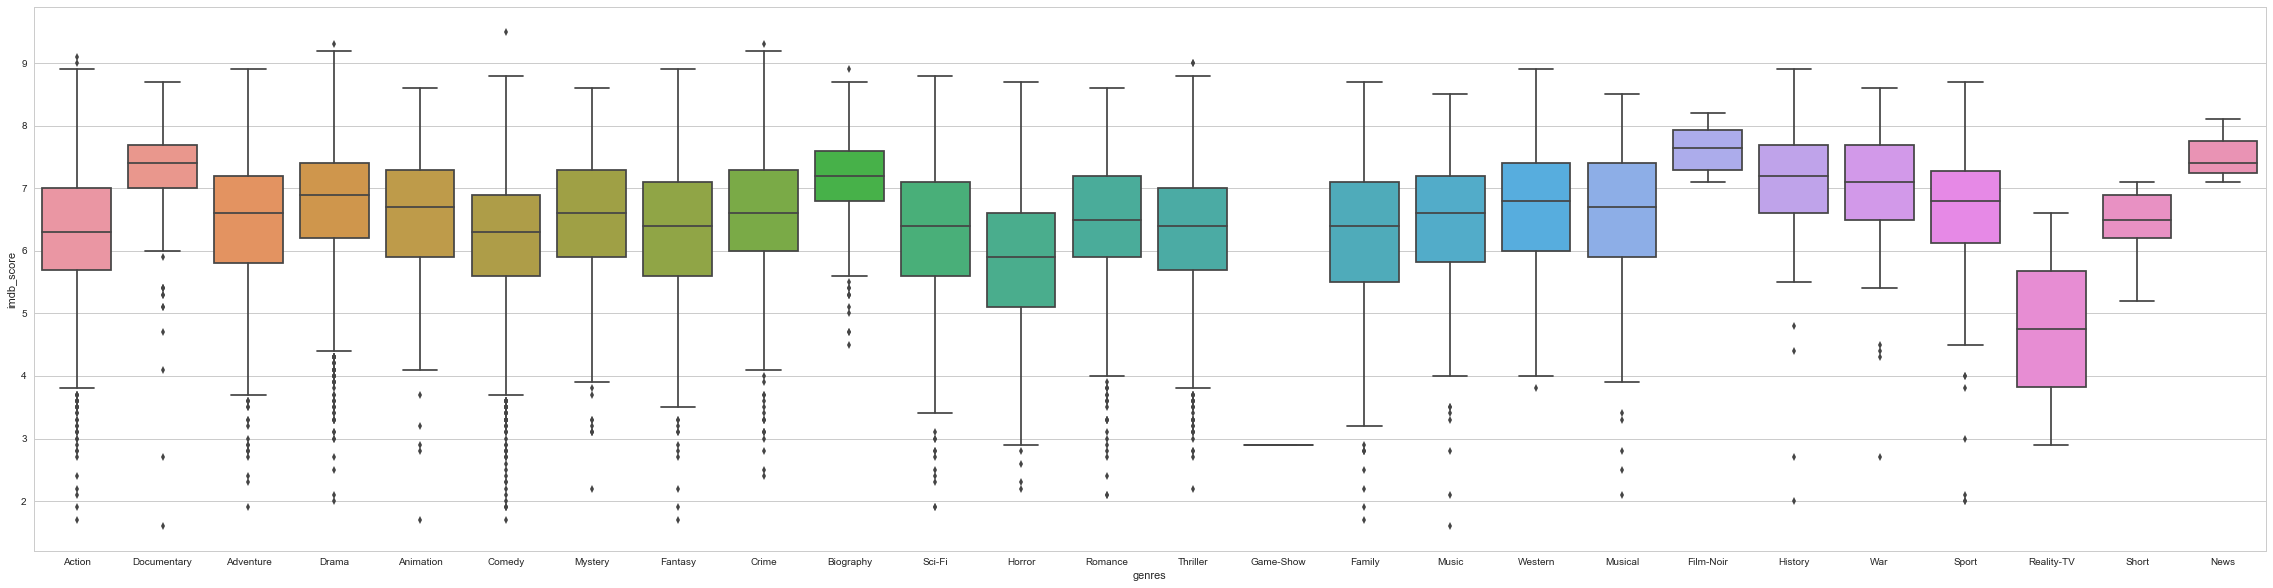

In [27]:
plt.figure(figsize=(40,10))
sns.boxplot(x='genres', y='imdb_score', data=genre_list )


QUESTION, how to order the boxplot in descending order?

Documentary, Biography, and File-Noir have better imdb_score;

Game Show, Reality-Tv have lower imdb_score.

In [28]:
genre_list2 = pd.melt(genre, id_vars=['gross'], value_vars=['genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7', 'genre8'],
                    var_name='variable', value_name='genres')
genre_list2 = genre_list2.dropna()
genre_list2

,gross,variable,genres
0,760505847.0,genre1,Action
1,309404152.0,genre1,Action
2,200074175.0,genre1,Action
3,448130642.0,genre1,Action
5,73058679.0,genre1,Action
6,336530303.0,genre1,Action
7,200807262.0,genre1,Adventure
8,458991599.0,genre1,Action
9,301956980.0,genre1,Adventure
10,330249062.0,genre1,Action


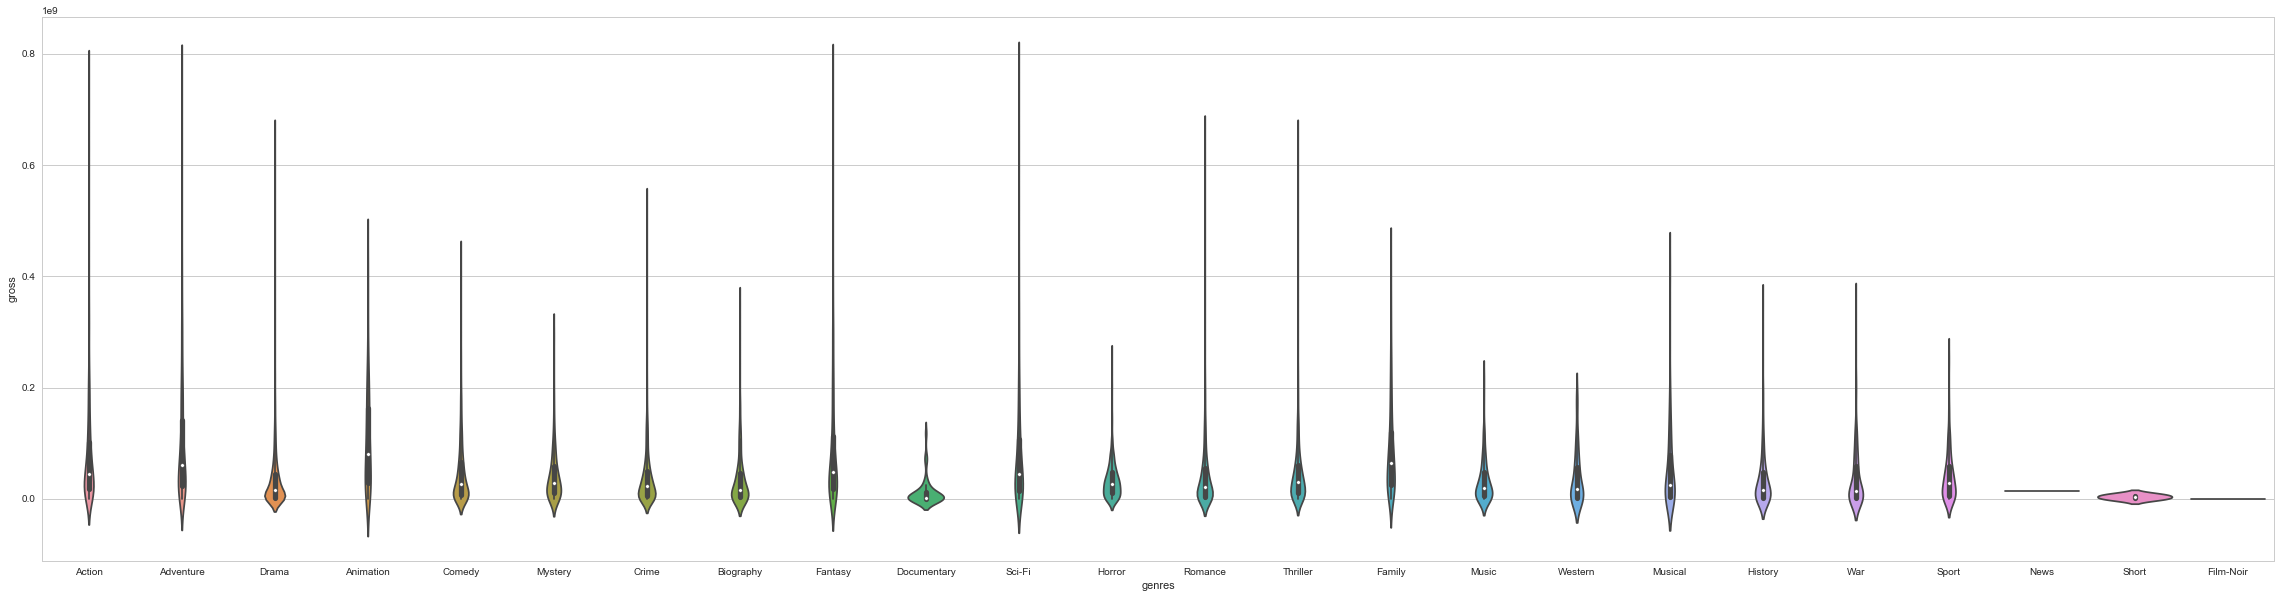

In [29]:
plt.figure(figsize=(40,10))
sns.violinplot(x="genres", y="gross", data=genre_list2)

Conclusion from above figure:

Documentary has low gross;

Action, Adventure, Fantasy, Sci-Fi have high gross.

# Actor and Director Imdb Score Ranking

In [30]:
actor = movie[['actor_1_name', 'actor_2_name', 'actor_3_name', 'gross', 'imdb_score']]
actor

,actor_1_name,actor_2_name,actor_3_name,gross,imdb_score
0,CCH Pounder,Joel David Moore,Wes Studi,760505847.0,7.9
1,Johnny Depp,Orlando Bloom,Jack Davenport,309404152.0,7.1
2,Christoph Waltz,Rory Kinnear,Stephanie Sigman,200074175.0,6.8
3,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,448130642.0,8.5
4,Doug Walker,Rob Walker,NaN,NaN,7.1
5,Daryl Sabara,Samantha Morton,Polly Walker,73058679.0,6.6
6,J.K. Simmons,James Franco,Kirsten Dunst,336530303.0,6.2
7,Brad Garrett,Donna Murphy,M.C. Gainey,200807262.0,7.8
8,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,458991599.0,7.5
9,Alan Rickman,Daniel Radcliffe,Rupert Grint,301956980.0,7.5


In [31]:
actor_list = pd.melt(actor, id_vars=['imdb_score'], value_vars=['actor_1_name', 'actor_2_name', 'actor_3_name'],
                    var_name='variable', value_name='actor_name')
actor_list

,imdb_score,variable,actor_name
0,7.9,actor_1_name,CCH Pounder
1,7.1,actor_1_name,Johnny Depp
2,6.8,actor_1_name,Christoph Waltz
3,8.5,actor_1_name,Tom Hardy
4,7.1,actor_1_name,Doug Walker
5,6.6,actor_1_name,Daryl Sabara
6,6.2,actor_1_name,J.K. Simmons
7,7.8,actor_1_name,Brad Garrett
8,7.5,actor_1_name,Chris Hemsworth
9,7.5,actor_1_name,Alan Rickman


In [32]:
#pivot
actor_list.pivot_table(values = ['imdb_score'], index = ['actor_name'] ,aggfunc=[np.mean], margins=True)


,mean
,imdb_score
actor_name,
50 Cent,5.960000
A. Michael Baldwin,6.500000
A.J. Buckley,6.040000
A.J. DeLucia,4.500000
A.J. Langer,3.900000
AJ Michalka,6.833333
Aaliyah,5.650000
Aaron Ashmore,5.350000


So the average imdb_score per actor is 6.44

In [33]:
score = actor_list['imdb_score'].groupby(actor_list['actor_name']).sum()
score = score.to_frame(name= 'imdb_score')

In [34]:
#10 actors with highest sum imdb_score
(score.sort_values('imdb_score', ascending = False)).head(10)

,imdb_score
actor_name,
Robert De Niro,363.8
Morgan Freeman,325.9
Johnny Depp,276.2
Matt Damon,268.9
Bruce Willis,265.1
Steve Buscemi,243.0
Brad Pitt,242.2
Bill Murray,235.2
Denzel Washington,227.7


In [35]:
director_list = movie[['director_name', 'imdb_score']]
director_score= director_list['imdb_score'].groupby(director_list['director_name']).sum()
director_score= director_score.to_frame(name= 'imdb_score')

In [36]:
#10 directors with highest sum imdb_score
(director_score.sort_values('imdb_score', ascending = False)).head(10)

,imdb_score
director_name,
Steven Spielberg,194.5
Woody Allen,154.2
Martin Scorsese,153.2
Clint Eastwood,144.5
Ridley Scott,120.2
Tim Burton,110.9
Steven Soderbergh,107.3
Spike Lee,105.1
Oliver Stone,97.3


So the top ten actors with the highest sum of IMDB score are:
    
    Robert De Niro, Morgan Freeman, Johnny Depp, Matt Damon, Bruce Willis, Steve Buscemi, Brad Pitt, Bill Murray,  Denzel Washington, Liam Neeson	
And the top ten directors with the highest sum of IMDB score are:
    
    Steven Spielberg, Woody Allen, Martin Scorsese, Clint Eastwood, Ridley Scott, Tim Burton, Steven Soderbergh, Spike Lee, Oliver Stone, Robert Zemeckis

# Actor and Director Gross Ranking

In [37]:
actor_list_gross = pd.melt(actor, id_vars=['gross'], value_vars=['actor_1_name', 'actor_2_name', 'actor_3_name'],
                    var_name='variable', value_name='actor_name')
actor_list_gross

,gross,variable,actor_name
0,760505847.0,actor_1_name,CCH Pounder
1,309404152.0,actor_1_name,Johnny Depp
2,200074175.0,actor_1_name,Christoph Waltz
3,448130642.0,actor_1_name,Tom Hardy
4,NaN,actor_1_name,Doug Walker
5,73058679.0,actor_1_name,Daryl Sabara
6,336530303.0,actor_1_name,J.K. Simmons
7,200807262.0,actor_1_name,Brad Garrett
8,458991599.0,actor_1_name,Chris Hemsworth
9,301956980.0,actor_1_name,Alan Rickman


In [38]:
gross = actor_list_gross['gross'].groupby(actor_list['actor_name']).sum()
gross = gross.to_frame(name= 'gross')
#10 actors with highest sum gross
(gross.sort_values('gross', ascending = False)).head(10)

,gross
actor_name,
Scarlett Johansson,4.231205e+09
Robert Downey Jr.,4.162541e+09
Morgan Freeman,3.938459e+09
Johnny Depp,3.719618e+09
Tom Hanks,3.612647e+09
Harrison Ford,3.479593e+09
Tom Cruise,3.330289e+09
J.K. Simmons,2.856407e+09
Will Smith,2.793313e+09


In [39]:
#10 directors with highest sum gross
director_list_gross = movie[['director_name', 'gross']]
director_score_gross= director_list_gross['gross'].groupby(director_list_gross['director_name']).sum()
director_score_gross= director_score_gross.to_frame(name= 'gross')
(director_score_gross.sort_values('gross', ascending = False)).head(10)

,gross
director_name,
Steven Spielberg,4.114233e+09
Peter Jackson,2.592969e+09
Michael Bay,2.231243e+09
Tim Burton,2.071275e+09
Sam Raimi,2.049549e+09
James Cameron,1.948126e+09
Christopher Nolan,1.813228e+09
George Lucas,1.741418e+09
Joss Whedon,1.730887e+09


So the top ten actors with the highest sum of gross are:
    
    Scarlett Johansson, Robert Downey Jr., Morgan Freeman, Johnny Depp, Tom Hanks, Harrison Ford, Tom Cruise, J.K. Simmons, Will Smith, Matt Damon

And the top ten directors with the highest sum of gross are:
    
    Steven Spielberg, Peter Jackson, Michael Bay, Tim Burton, Sam Raimi, James Cameron, Christopher Nolan, George Lucas, Joss Whedon, Robert Zemeckis

# Conclusion:

### About imdb_score:
1. imdb_score and num_voted_users in high positive correlation;
2. imdb_score and num_user_for_reviews in high positive correlation;
3. imdb_score and movie_facebook_likes in medium poitive correlation;
4. imdb_score and cast_total_facebook_likes in low positive correlation;
5. imdb_score and title_year in negative correlation;
6. imdb_score and facenumber_in_poster in negative correlation;
7. imdb_score seems has no correlation with budget;



### About gross:
1. gross and num_voted_users in high positive correlation;
2. gross and num_user_for_reviews in high positive correlation;
3. gross and movie_facebook_likes in high poitive correlation;
4. gross and cast_total_facebook_likes in medium positive correlation;
5. gross and imdb_score has little correlation.



### About gross and Imdb score trending:

+ We have more high gross movies after 1995, but the inflation rate would be a skew factor for the data.
+ Imdb score rating number is growing, but the rating score is descending.



### About Genres:

+ Game Show, Reality-Tv have lower imdb_score;
+ Documentary, Biography, and File-Noir have better imdb_score.
+ Documentary has low gross;
+ Action, Adventure, Fantasy, Sci-Fi have high gross.



### About imdb score with actors and director:

+ So the top ten actors with the highest sum of IMDB score are:

Robert De Niro, Morgan Freeman, Johnny Depp, Matt Damon, Bruce Willis, Steve Buscemi, Brad Pitt, Bill Murray,  Denzel Washington, Liam Neeson	
    
+ And the top ten directors with the highest sum of IMDB score are:

Steven Spielberg, Woody Allen, Martin Scorsese, Clint Eastwood, Ridley Scott, Tim Burton, Steven Soderbergh, Spike Lee, Oliver Stone, Robert Zemeckis
    
    
    
### About gross with actors and director:

+ So the top ten actors with the highest sum of gross are:

Scarlett Johansson, Robert Downey Jr., Morgan Freeman, Johnny Depp, Tom Hanks, Harrison Ford, Tom Cruise, J.K. Simmons, Will Smith, Matt Damon

+ And the top ten directors with the highest sum of gross are:

Steven Spielberg, Peter Jackson, Michael Bay, Tim Burton, Sam Raimi, James Cameron, Christopher Nolan, George Lucas, Joss Whedon, Robert Zemeckis
